In [1]:
!pip install xlrd

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics for evaluating the regression model
from sklearn.metrics import mean_squared_error, r2_score

# Importing function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing  models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
#looking at the data in jupyter notebook
df = pd.read_excel(r"C:\Users\kaohs\Desktop\Ironhack 2024\Project\Ironhack-Final-project-\Dataset\user_behavior_dataset.xlsx")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Exploratory Data Analysis (EDA)

In [3]:
#Creating a copy to work on without changing the original dataset
df1=df.copy()

In [4]:
df1.shape

(700, 11)

In [5]:
# Get information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df1.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [7]:
# Checking for duplicate rows in the DataFrame
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [8]:
# Check for missing values
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [9]:
# Displaying the data types of each column in the DataFrame
df1.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

# Correlation Matrix

In [10]:
df1 = pd.get_dummies(df1, columns=['Device Model', 'Gender', 'Operating System'], drop_first=True)

df1


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Gender_Male,Operating System_iOS
0,1,393,6.4,1872,67,1122,40,4,False,False,False,False,True,False
1,2,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,True,False,True,False
3,4,239,4.8,1676,56,871,20,3,False,False,False,False,True,False
4,5,187,4.3,1367,58,988,31,3,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,False,False,False,True,True,True
696,697,316,6.8,1965,68,1201,59,4,False,False,True,False,True,False
697,698,99,3.1,942,22,457,50,2,False,False,False,False,False,False
698,699,62,1.7,431,13,224,44,1,False,True,False,False,True,False


In [11]:
correlation_matrix = df1.corr()
correlation_matrix

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Gender_Male,Operating System_iOS
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242,0.006082,0.035150,-0.039691,0.005359,0.019259,0.005359
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498,-0.002038,-0.012876,-0.007760,0.031577,-0.004551,0.031577
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581,-0.004953,0.007160,0.003421,0.026470,0.003573,0.026470
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587,-0.000774,-0.012181,0.002332,0.040361,0.006271,0.040361
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255,-0.012799,0.002214,-0.014429,0.038984,0.016245,0.038984
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734,-0.014093,0.001611,0.008359,0.028687,0.023151,0.028687
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563,0.016011,0.025415,-0.030608,0.020358,0.006965,0.020358
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000,-0.004342,-0.004342,-0.006377,0.041326,-0.000735,0.041326
Device Model_OnePlus 9,0.006082,-0.002038,-0.004953,-0.000774,-0.012799,-0.014093,0.016011,-0.004342,1.000000,-0.234568,-0.248631,-0.248631,0.020700,-0.248631
Device Model_Samsung Galaxy S21,0.035150,-0.012876,0.007160,-0.012181,0.002214,0.001611,0.025415,-0.004342,-0.234568,1.000000,-0.248631,-0.248631,0.071723,-0.248631


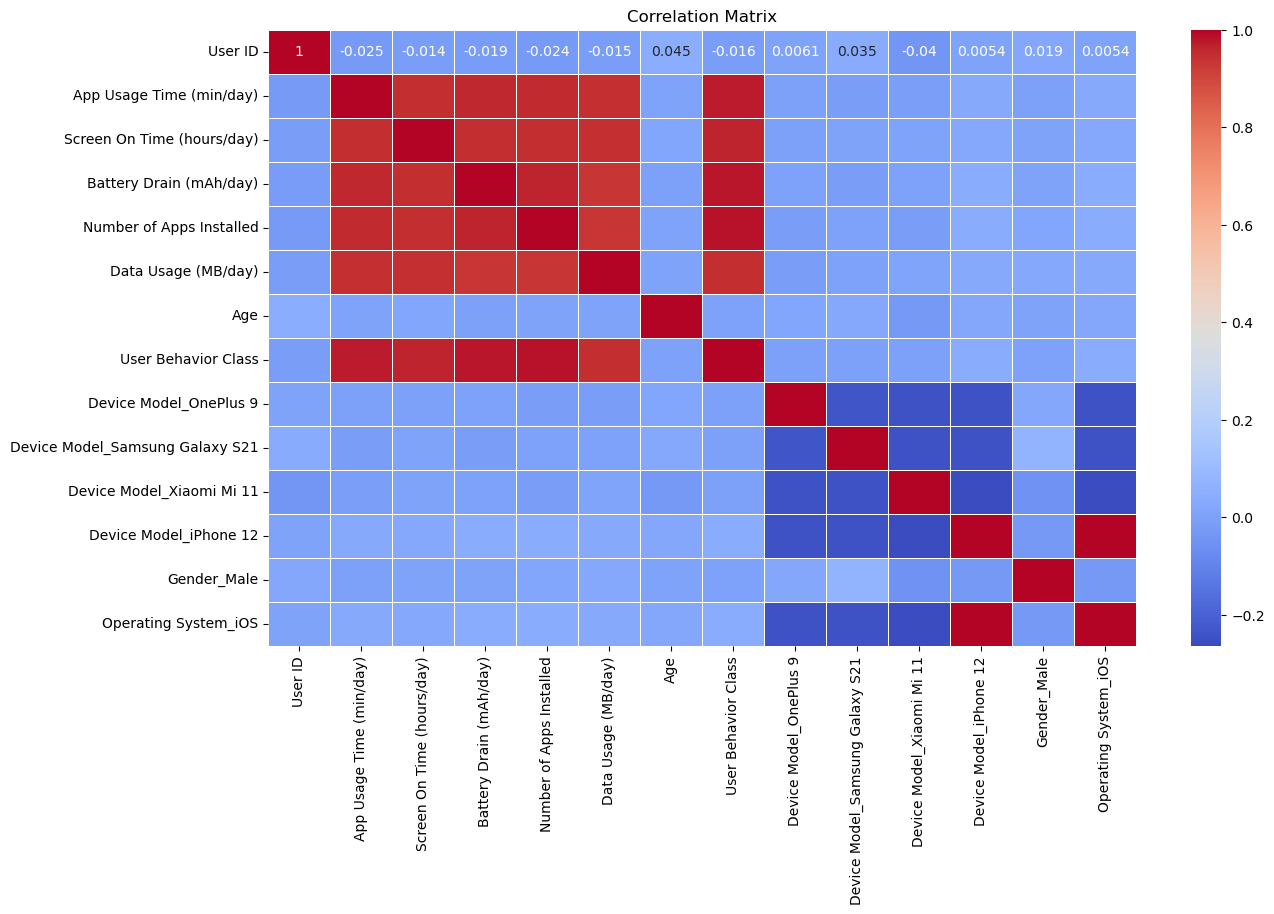

In [12]:
# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
correlation_with_model = correlation_matrix["Operating System_iOS"].sort_values(ascending=False)
correlation_with_model

Device Model_iPhone 12             1.000000
Operating System_iOS               1.000000
User Behavior Class                0.041326
Battery Drain (mAh/day)            0.040361
Number of Apps Installed           0.038984
App Usage Time (min/day)           0.031577
Data Usage (MB/day)                0.028687
Screen On Time (hours/day)         0.026470
Age                                0.020358
User ID                            0.005359
Gender_Male                       -0.027589
Device Model_Samsung Galaxy S21   -0.248631
Device Model_OnePlus 9            -0.248631
Device Model_Xiaomi Mi 11         -0.263538
Name: Operating System_iOS, dtype: float64

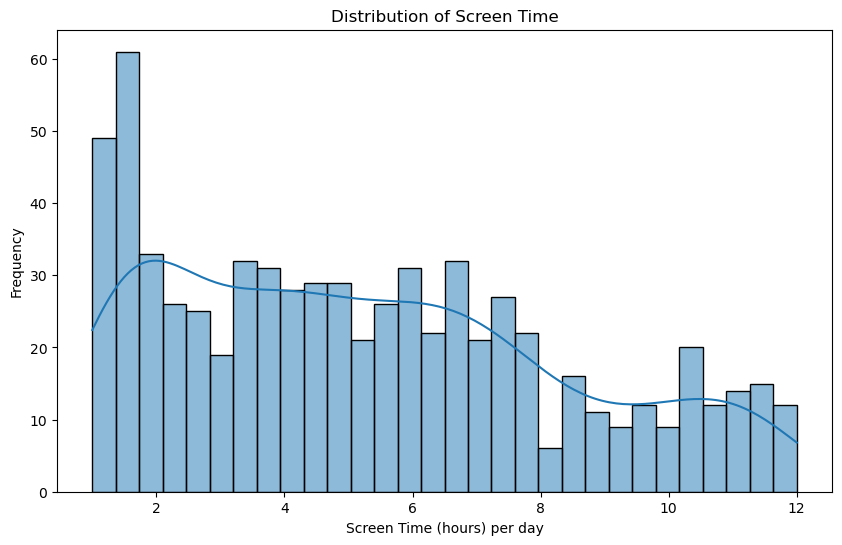

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Screen On Time (hours/day)'], bins=30, kde=True)
plt.title("Distribution of Screen Time")
plt.xlabel("Screen Time (hours) per day")
plt.ylabel("Frequency")
plt.show()

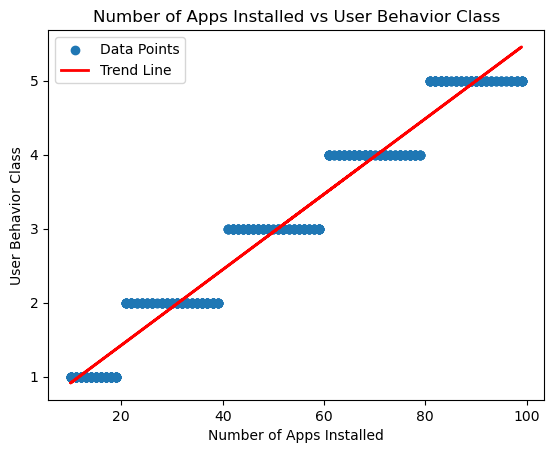

In [15]:
# Creating a scatter plot to visualize the relationship between house price and house size
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x=df1['Number of Apps Installed'], y=df1['User Behavior Class'], label='Data Points')
slope, intercept = np.polyfit(df1['Number of Apps Installed'], df1['User Behavior Class'], 1)
trend_y = slope * df1['Number of Apps Installed'] + intercept


plt.plot(df1['Number of Apps Installed'], trend_y, color='red', linewidth=2, label='Trend Line')


plt.title('Number of Apps Installed vs User Behavior Class')
plt.xlabel('Number of Apps Installed')
plt.ylabel('User Behavior Class')
plt.legend() 

plt.show()


# Data Processing

In [16]:
X = df1.drop(['Operating System_iOS', 'Device Model_iPhone 12','User ID','User Behavior Class'], axis=1)
y = df1['Operating System_iOS']

In [17]:
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


Since this is a target for whichthe options are either yes it is an Ios Phone or No , we will be using classification models. 

In [18]:
# Initialize and train the model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [19]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print("\nClassification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.95      0.90       110
        True       0.69      0.37      0.48        30

    accuracy                           0.83       140
   macro avg       0.77      0.66      0.69       140
weighted avg       0.81      0.83      0.81       140


Confusion Matrix:
 [[105   5]
 [ 19  11]]


In [20]:
df1['Operating System_iOS'].value_counts()


Operating System_iOS
False    554
True     146
Name: count, dtype: int64

This category is too imbalanced, instead of predicting the results the model will simply be guessing that the phones are not IoS models because the probability that they are not is higher.Therefore to prevent this from happening we are going to need to Oversample the training set.

In [21]:
#Trying to balance the data to enable the model predict more accurately all values for Operating System_iOS.
from imblearn.over_sampling import SMOTE

x = df1.drop(['Operating System_iOS', 'Device Model_iPhone 12','User ID','User Behavior Class'], axis=1)
y = df1['Operating System_iOS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()

Operating System_iOS
False    443
True     443
Name: count, dtype: int64

In [22]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(x_train, y_train)

predictions = classification.predict(x_test)
print("\nClassification Report:\n",classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.76      0.86       111
        True       0.52      1.00      0.68        29

    accuracy                           0.81       140
   macro avg       0.76      0.88      0.77       140
weighted avg       0.90      0.81      0.82       140


Confusion Matrix:
 [[84 27]
 [ 0 29]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8071428571428572

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.86      0.88       111
        True       0.53      0.59      0.56        29

    accuracy                           0.81       140
   macro avg       0.71      0.73      0.72       140
weighted avg       0.81      0.81      0.81       140


Confusion Matrix:
 [[96 15]
 [12 17]]
